In [ ]:
# Image classification using CNN on cat vs dogs using pytorch
# CIFER 10 image classification using CNN and pytorch
# Resnet 18

# XOR and OR using single neural network
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
dataset_url="https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,'.')                                              # downloading dataset in target folder

100%|██████████| 135M/135M [00:03<00:00, 42.0MB/s]


In [ ]:
with tarfile.open('./cifar10.tgz','r:gz') as tar:            # extracting
    tar.extractall(path='./data')

In [ ]:
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder         # to load dataset as pytorch tensors

In [ ]:
dataset=ImageFolder('data/cifar10/train',transform=ToTensor())
print(dataset[1])

(tensor([[[0.4941, 0.4784, 0.4941,  ..., 0.4863, 0.4706, 0.4588],
         [0.4784, 0.4667, 0.4745,  ..., 0.4863, 0.4784, 0.4588],
         [0.4784, 0.4745, 0.4745,  ..., 0.4941, 0.4824, 0.4745],
         ...,
         [0.4941, 0.4941, 0.5020,  ..., 0.5216, 0.4784, 0.4471],
         [0.4902, 0.4941, 0.4980,  ..., 0.5020, 0.4745, 0.4471],
         [0.4824, 0.4824, 0.4941,  ..., 0.5020, 0.4941, 0.4745]],

        [[0.4627, 0.4510, 0.4667,  ..., 0.4627, 0.4471, 0.4353],
         [0.4510, 0.4392, 0.4471,  ..., 0.4627, 0.4549, 0.4353],
         [0.4510, 0.4471, 0.4471,  ..., 0.4706, 0.4588, 0.4510],
         ...,
         [0.4627, 0.4627, 0.4706,  ..., 0.4902, 0.4471, 0.4157],
         [0.4588, 0.4627, 0.4667,  ..., 0.4706, 0.4431, 0.4157],
         [0.4510, 0.4510, 0.4627,  ..., 0.4667, 0.4627, 0.4431]],

        [[0.4314, 0.4235, 0.4353,  ..., 0.4157, 0.4000, 0.3882],
         [0.4196, 0.4078, 0.4157,  ..., 0.4157, 0.4078, 0.3882],
         [0.4196, 0.4157, 0.4157,  ..., 0.4235, 0.4118, 0

In [ ]:
input , label=dataset[3]
print(input)
print('\n')
print(label)

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.

In [ ]:
len(dataset)

50000

In [ ]:
print(input.shape)

torch.Size([3, 32, 32])


In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor']='#ffffff'

In [ ]:
def showing(input , label):
  print('output:',dataset.classes[label],'image shape:',input.shape)
  plt.imshow(input.permute((1,2,0)))

output: airplane image shape: torch.Size([3, 32, 32])


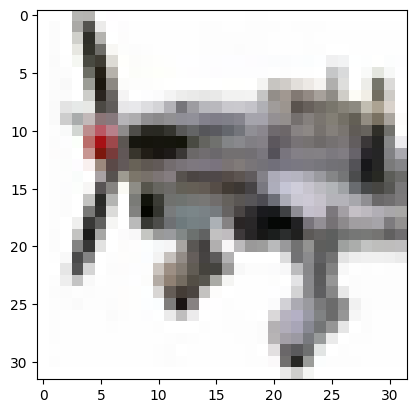

In [ ]:
showing(input,label)

In [ ]:
train_ds , val_ds=random_split(dataset,[45000,5000])
print(len(train_ds))
print('\n')
print(len(val_ds))

45000


5000


In [ ]:
from torch.utils.data.dataloader import DataLoader

train_dl=DataLoader(train_ds,batch_size=128,shuffle=True,num_workers=2)     # num worker specifies cpu cores to execute
val_dl=DataLoader(val_ds,batch_size=256,shuffle=True,num_workers=2)

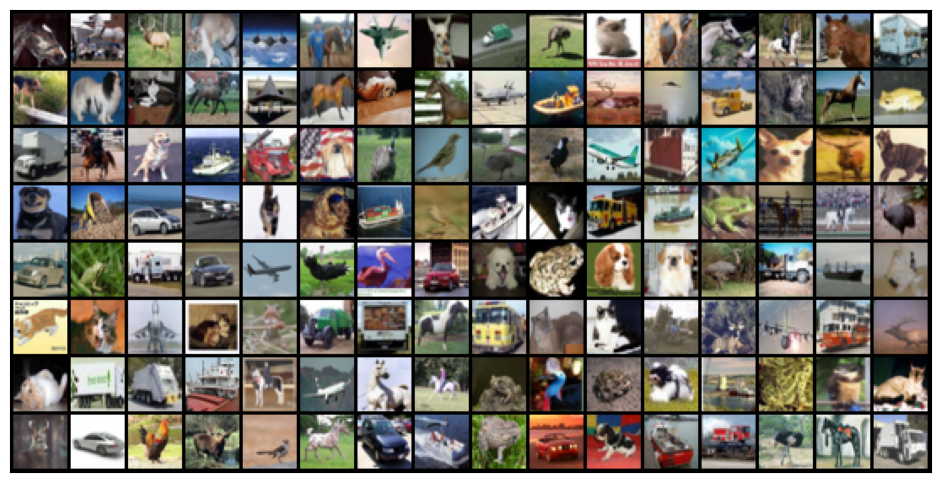

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):                                               # to visualize the dataset at once
  for images , labels in dl:
    fig , ax=plt.subplots(figsize=(12,6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))           # moving the channel dimension to last one to make it compatible for matplotlib
    break
show_batch(train_dl)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
test_ds=ImageFolder('data/cifar10/test',transform=ToTensor())
test_dl=DataLoader(test_ds,batch_size=128,shuffle=True,num_workers=2)

In [ ]:
######################################## CNN with Xavier initialization , relu and adam optimizer###################################################
class CNNModel(nn.Module):
    def __init__(self, input_shape=(3, 32, 32)):
        super(CNNModel, self).__init__()

        # Convolutional layers (3 in this case)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        # Activation function relu
        self.relu = nn.ReLU()

        # Pooling layer . I decided to use max pooling as it generalises well
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Calculate flattened feature size dynamically
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            dummy_output = self._forward_conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).size(1)

        # Fully connected layers like normal neural network
        self.fc1 = nn.Linear(flattened_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 64)
        self.fc6 = nn.Linear(64, 10)

        # Dropout layer to reduce overfitting
        self.dropout = nn.Dropout(0.5)

        def _initialize_weights(self):
        # Applying Xavier initialization to convolutional layers
          for m in self.modules():
              if isinstance(m, nn.Conv2d):
                  nn.init.xavier_normal_(m.weight)
                  if m.bias is not None:
                      nn.init.zeros_(m.bias)

              # Applying Xavier initialization to FC layers
              if isinstance(m, nn.Linear):
                  nn.init.xavier_normal_(m.weight)
                  if m.bias is not None:
                      nn.init.zeros_(m.bias)

    def _forward_conv(self, x):                                        #feed forward for convolutional layers
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        return x

    def forward(self, x):                                              # feed forward for neural layers
        x = self._forward_conv(x)
        x = torch.flatten(x, 1)       # Flatten the tensor dynamically
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.dropout(x)            # Apply dropout
        x = self.fc6(x)                # Final output layer (logits)

        return x

# Initializzing the first CNN model the model
model = CNNModel()
print(model)

# Defining loss function and optimizer (cross entropy for multi class classification)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training function
def train_model(model, train_dl, val_dl, epochs=10):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for images, labels in train_dl:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_dl):.4f}')

# Train the model
train_model(model, train_dl, val_dl, epochs=600)

# Save the trained model
torch.save(model.state_dict(), 'cnn_model.pth')




CNNModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Epoch 1/600, Train Loss: 2.0814
Epoch 2/600, Train Loss: 1.8233
Epoch 3/600, Train Loss: 1.6931
Epoch 4/600, Train Loss: 1.6340
Epoch 5/600, Train Loss: 1.5631
Epoch 6/600, Train Loss: 1.5001
Epoch 7/600, Train Loss: 1.4300
Epoch 8/600, Train Loss: 1.386

In [ ]:

def test_model(model , test_dl):                     # function for testing
  correct=0
  total_loss=0
  with torch.no_grad():
    for images , labels in test_dl:
      outputs=model(images)
      loss=criterion(outputs,labels)
      total_loss+=loss.item()
      _,predicted=torch.max(outputs,1)
      correct+=(predicted==labels).sum().item()
  print("Total loss per batch: ", total_loss/len(test_dl))
  return correct

c=test_model(model,test_dl)
print("Accuracy is : ",100*c/(len(test_dl)*128))

Total loss per batch:  2.9762251241297664
Accuracy is :  60.354034810126585


In [ ]:
def validation(model , val_dl):                        # function for validating
  with torch.no_grad():
    for images , labels in val_dl:
      outputs=model(images)
      _,predicted=torch.max(outputs,1)
      print(predicted)
      print(labels)
      break

validation(model , val_dl)

tensor([6, 0, 0, 3, 1, 2, 8, 7, 1, 5, 9, 8, 4, 0, 3, 2, 8, 5, 3, 7, 8, 4, 8, 7,
        5, 7, 5, 2, 3, 9, 1, 3, 9, 7, 5, 3, 2, 3, 4, 3, 2, 9, 5, 8, 5, 0, 3, 3,
        0, 4, 0, 1, 3, 7, 5, 8, 9, 5, 1, 8, 3, 9, 3, 2, 8, 7, 3, 1, 3, 8, 0, 7,
        8, 0, 8, 5, 7, 6, 9, 1, 9, 2, 5, 5, 4, 9, 0, 5, 3, 0, 1, 9, 8, 8, 4, 8,
        8, 8, 9, 9, 1, 6, 7, 7, 1, 8, 8, 7, 3, 6, 8, 0, 3, 7, 8, 4, 8, 1, 3, 9,
        5, 1, 7, 5, 9, 3, 5, 0, 9, 2, 4, 8, 3, 7, 8, 5, 9, 8, 8, 2, 1, 2, 8, 1,
        5, 6, 2, 2, 4, 4, 2, 3, 9, 7, 7, 6, 3, 7, 2, 7, 9, 6, 4, 8, 7, 0, 6, 5,
        1, 1, 7, 4, 8, 8, 1, 0, 2, 8, 4, 7, 8, 2, 1, 7, 4, 5, 7, 9, 9, 6, 2, 2,
        6, 3, 2, 8, 7, 7, 7, 7, 9, 6, 9, 6, 1, 0, 7, 4, 6, 4, 7, 9, 2, 1, 3, 9,
        3, 2, 1, 7, 3, 0, 9, 7, 3, 4, 2, 7, 6, 4, 7, 9, 7, 2, 3, 6, 2, 7, 7, 6,
        0, 1, 3, 9, 4, 2, 7, 2, 0, 0, 8, 7, 7, 8, 6, 4])
tensor([1, 2, 0, 4, 1, 4, 8, 7, 2, 5, 9, 8, 6, 0, 1, 2, 8, 5, 3, 7, 0, 4, 0, 7,
        6, 7, 5, 2, 3, 7, 1, 5, 9, 2, 5, 3, 7, 3, 3, 1, 7, 1, 9

In [ ]:
######################################################################## End for first CNN##############################################################################

In [ ]:
####################################CNN with xavier initialization , relu and sgd optimizer#####################################################################################
class CNN2(nn.Module):
  def __init__(self,input_shape=(3,32,32)):
    super(CNN2 , self).__init__()

    self.conv1=nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.conv3=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)

    self.relu=nn.ReLU()

    self.pool=nn.MaxPool2d(kernel_size=2,stride=2,padding=0)

    with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            dummy_output = self._forward_conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).size(1)

    self.layer1=nn.Linear(flattened_size,32)
    self.layer2=nn.Linear(32,32)
    self.layer3=nn.Linear(32,32)
    self.layer4=nn.Linear(32,32)
    self.layer5=nn.Linear(32,32)
    self.layer6=nn.Linear(32,10)

    self.dropout=nn.Dropout(0.5)

    def _initialize_weights(self):
      for m in self.modules():
        if isinstance(m,nn.Conv2d):
          nn.init.xavier_normal_(m.weight)
          if m.bias is not None:
            nn.init.zeros_(m.bias)

        if isinstance(m,nn.Linear):
          nn.init.xavier_normal_(m.weight)
          if m.bias is not None:
            nn.init.zeros_(m.bias)

  def _forward_conv(self,x):
    x=self.pool(self.relu(self.conv1(x)))
    x=self.pool(self.relu(self.conv2(x)))
    x=self.pool(self.relu(self.conv3(x)))
    return x

  def forward(self,x):
    x=self._forward_conv(x)
    x=torch.flatten(x,1)
    x=self.relu(self.layer1(x))
    x=self.relu(self.layer2(x))
    x=self.relu(self.layer3(x))
    x=self.relu(self.layer4(x))
    x=self.relu(self.layer5(x))
    x=self.dropout(x)
    x=self.layer6(x)

    return x

model2=CNN2()


In [ ]:
opt2=torch.optim.SGD(model2.parameters(),lr=0.001)
loss2=nn.CrossEntropyLoss()

def train_model2(model2 ,opt2 , loss2,epoch):
  for e in range(epoch):
    model2.train()
    total_loss=0
    for images , label in train_dl:
      opt2.zero_grad()
      output=model2(images)
      loss=loss2(output,label)
      loss.backward()
      opt2.step()
      total_loss+=loss.item()

    print(f'Epoch {e+1}/{epoch}, Train Loss: {total_loss/len(train_dl):.4f}')

train_model2(model2 ,opt2,loss2,550)

Epoch 1/550, Train Loss: 1.6604
Epoch 2/550, Train Loss: 1.6621
Epoch 3/550, Train Loss: 1.6578
Epoch 4/550, Train Loss: 1.6555
Epoch 5/550, Train Loss: 1.6536
Epoch 6/550, Train Loss: 1.6527
Epoch 7/550, Train Loss: 1.6519
Epoch 8/550, Train Loss: 1.6473
Epoch 9/550, Train Loss: 1.6454
Epoch 10/550, Train Loss: 1.6473
Epoch 11/550, Train Loss: 1.6478
Epoch 12/550, Train Loss: 1.6460
Epoch 13/550, Train Loss: 1.6429
Epoch 14/550, Train Loss: 1.6431
Epoch 15/550, Train Loss: 1.6434
Epoch 16/550, Train Loss: 1.6402
Epoch 17/550, Train Loss: 1.6382
Epoch 18/550, Train Loss: 1.6387
Epoch 19/550, Train Loss: 1.6357
Epoch 20/550, Train Loss: 1.6359
Epoch 21/550, Train Loss: 1.6367
Epoch 22/550, Train Loss: 1.6346
Epoch 23/550, Train Loss: 1.6333
Epoch 24/550, Train Loss: 1.6307
Epoch 25/550, Train Loss: 1.6347
Epoch 26/550, Train Loss: 1.6323
Epoch 27/550, Train Loss: 1.6290
Epoch 28/550, Train Loss: 1.6290
Epoch 29/550, Train Loss: 1.6276
Epoch 30/550, Train Loss: 1.6268
Epoch 31/550, Train

In [ ]:
test_ds=ImageFolder('data/cifar10/test',transform=ToTensor())
test_dl=DataLoader(test_ds,batch_size=128,shuffle=True,num_workers=2)
def test_model(model2 , test_dl , loss2):
  correct=0
  total_loss=0
  with torch.no_grad():
    for images , labels in test_dl:
      outputs=model2(images)
      loss=loss2(outputs,labels)
      total_loss+=loss.item()
      _,predicted=torch.max(outputs,1)
      correct+=(predicted==labels).sum().item()
  print(total_loss/len(test_dl))
  return correct

c=test_model(model2,test_dl,loss2)
print("number of correct prediction ber batch is: ",c/len(test_dl))
print("Accuracy is: ",100*c/(len(test_dl)*128))

1.3115394145627566
number of correct prediction ber batch is:  66.26582278481013
Accuracy is:  51.77017405063291


In [ ]:
def validation(model2 , val_dl):
  correct=0
  with torch.no_grad():
    for images , labels in val_dl:
      outputs=model2(images)
      _,predicted=torch.max(outputs,1)
      correct+=(predicted==labels).sum().item()
      print(predicted)
      print('\n')
      print(labels)
      break

validation(model2 , val_dl)

tensor([0, 1, 6, 9, 3, 5, 0, 4, 2, 7, 6, 0, 8, 9, 8, 6, 2, 9, 9, 8, 2, 3, 6, 8,
        0, 4, 3, 5, 0, 5, 4, 9, 0, 9, 9, 5, 6, 6, 5, 1, 1, 7, 7, 7, 5, 4, 7, 9,
        1, 4, 6, 6, 2, 6, 6, 7, 0, 7, 8, 2, 6, 8, 0, 9, 6, 4, 9, 1, 4, 1, 6, 6,
        9, 4, 6, 9, 1, 5, 5, 0, 3, 9, 0, 0, 0, 6, 1, 6, 1, 7, 5, 7, 1, 4, 6, 8,
        0, 5, 0, 3, 7, 8, 7, 4, 7, 2, 7, 8, 3, 3, 0, 2, 1, 1, 4, 7, 7, 7, 8, 7,
        9, 7, 4, 1, 2, 9, 8, 3, 6, 5, 5, 3, 5, 9, 8, 7, 8, 9, 8, 8, 9, 6, 3, 4,
        5, 7, 6, 2, 8, 0, 5, 4, 6, 9, 3, 1, 0, 1, 8, 3, 7, 8, 3, 6, 0, 7, 9, 0,
        4, 4, 3, 8, 6, 4, 0, 5, 5, 2, 5, 1, 4, 0, 0, 6, 7, 4, 1, 9, 1, 6, 8, 7,
        6, 5, 8, 5, 7, 7, 1, 9, 2, 7, 7, 3, 1, 4, 4, 5, 7, 5, 6, 2, 0, 3, 4, 8,
        3, 4, 6, 7, 9, 0, 3, 6, 2, 8, 6, 3, 5, 1, 6, 6, 3, 5, 0, 2, 8, 9, 0, 5,
        5, 4, 1, 4, 1, 8, 4, 9, 6, 7, 2, 8, 4, 8, 0, 0])


tensor([0, 8, 6, 1, 4, 5, 6, 4, 4, 2, 6, 0, 8, 9, 1, 4, 2, 9, 9, 8, 3, 1, 4, 8,
        9, 3, 6, 7, 0, 3, 3, 9, 0, 9, 9, 5, 3, 6, 5, 9, 9, 0,

In [ ]:
##################################################################################### END #############################################################


In [ ]:
########################################################### CNN with relu and Adam optimizer#######################################################################

class CNN3(nn.Module):
  def __init__(self,input_shape=(3,32,32)):
    super(CNN3 , self).__init__()

    self.conv1=nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.conv3=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)

    self.relu=nn.ReLU()

    self.pool=nn.MaxPool2d(kernel_size=2,stride=2,padding=0)

    with torch.no_grad():
            dummy_input = torch.zeros(1,*input_shape)
            dummy_output=self._forward_conv(dummy_input)
            flattened_size=dummy_output.view(1,-1).size(1)

    self.layer1=nn.Linear(flattened_size,32)
    self.layer2=nn.Linear(32,64)
    self.layer3=nn.Linear(64,64)
    self.layer4=nn.Linear(64,64)
    self.layer5=nn.Linear(64,64)
    self.layer6=nn.Linear(64,10)

    self.dropout=nn.Dropout(0.5)

  def _forward_conv(self,x):
    x=self.pool(self.relu(self.conv1(x)))
    x=self.pool(self.relu(self.conv2(x)))
    x=self.pool(self.relu(self.conv3(x)))
    return x

  def forward(self,x):
    x=self._forward_conv(x)
    x=torch.flatten(x,1)
    x=self.relu(self.layer1(x))
    x=self.relu(self.layer2(x))
    x=self.relu(self.layer3(x))
    x=self.relu(self.layer4(x))
    x=self.relu(self.layer5(x))
    x=self.dropout(x)
    x=self.layer6(x)

    return x

model3=CNN3()

opt3=torch.optim.Adam(model3.parameters(),lr=1e-3)
loss_fn=nn.CrossEntropyLoss()
def train_model(model3 , opt3 ,loss_fn , epoch , train_dl):
  for e in range(epoch):
    model3.train()
    total_loss=0
    for images , label in train_dl:
      opt3.zero_grad()
      output=model3(images)
      loss=loss_fn(output,label)
      total_loss+=loss.item()
      loss.backward()
      opt3.step()
    print(f'Epoch {e+1}/{epoch}, Train Loss: {total_loss/len(train_dl):.4f}')

train_model(model3 , opt3 ,loss_fn , 550 , train_dl)

Epoch 1/550, Train Loss: 2.0698
Epoch 2/550, Train Loss: 1.8788
Epoch 3/550, Train Loss: 1.7377
Epoch 4/550, Train Loss: 1.6589
Epoch 5/550, Train Loss: 1.6119
Epoch 6/550, Train Loss: 1.5591
Epoch 7/550, Train Loss: 1.5184
Epoch 8/550, Train Loss: 1.4673
Epoch 9/550, Train Loss: 1.4325
Epoch 10/550, Train Loss: 1.3686
Epoch 11/550, Train Loss: 1.3306
Epoch 12/550, Train Loss: 1.3024
Epoch 13/550, Train Loss: 1.2691
Epoch 14/550, Train Loss: 1.2506
Epoch 15/550, Train Loss: 1.2285
Epoch 16/550, Train Loss: 1.2098
Epoch 17/550, Train Loss: 1.1830
Epoch 18/550, Train Loss: 1.1798
Epoch 19/550, Train Loss: 1.1547
Epoch 20/550, Train Loss: 1.1333
Epoch 21/550, Train Loss: 1.1180
Epoch 22/550, Train Loss: 1.1059
Epoch 23/550, Train Loss: 1.0929
Epoch 24/550, Train Loss: 1.0816
Epoch 25/550, Train Loss: 1.0701
Epoch 26/550, Train Loss: 1.0612
Epoch 27/550, Train Loss: 1.0474
Epoch 28/550, Train Loss: 1.0387
Epoch 29/550, Train Loss: 1.0277
Epoch 30/550, Train Loss: 1.0132
Epoch 31/550, Train

In [ ]:
def test_model3(model3 , test_dl,loss_fn):
  total_loss=0
  correct=0
  with torch.no_grad():
    for images , labels in test_dl:
      outputs=model3(images)
      loss=loss_fn(outputs,labels)
      total_loss+=loss.item()
      _,predicted=torch.max(outputs,1)
      correct+=(predicted==labels).sum().item()
  print("Total loss per batch: ",total_loss/len(test_dl))
  return correct

c=test_model3(model3 , test_dl , loss_fn)
print("number of correct prediction ber batch is: ",c/len(test_dl))
print("Accuracy is: ",100*c/(len(test_dl)*128))

Total loss per batch:  2.5367193161686763
number of correct prediction ber batch is:  78.51898734177215
Accuracy is:  61.342958860759495


In [ ]:
def val_model3(model3 , val_dl):
  with torch.no_grad():
    for images , labels in val_dl:
      outputs=model3(images)
      _,predicted=torch.max(outputs,1)
      print(predicted)
      print(labels)
      break

val_model3(model3 , val_dl)

tensor([1, 0, 6, 7, 8, 9, 8, 8, 0, 8, 1, 9, 3, 4, 0, 6, 6, 3, 6, 4, 7, 0, 4, 1,
        7, 8, 3, 2, 7, 6, 2, 8, 4, 3, 6, 7, 5, 0, 1, 4, 2, 6, 3, 4, 7, 6, 6, 4,
        4, 5, 9, 1, 4, 4, 4, 9, 3, 3, 0, 3, 3, 1, 5, 9, 6, 4, 8, 3, 3, 0, 5, 4,
        5, 0, 6, 6, 9, 3, 4, 9, 4, 5, 3, 4, 5, 4, 9, 0, 0, 4, 1, 0, 8, 6, 6, 0,
        9, 8, 1, 2, 8, 0, 5, 8, 5, 4, 1, 4, 3, 9, 0, 3, 1, 3, 8, 9, 8, 4, 6, 3,
        8, 3, 7, 8, 4, 0, 7, 3, 9, 7, 2, 5, 8, 6, 6, 1, 8, 0, 6, 8, 1, 5, 4, 4,
        0, 6, 7, 2, 4, 0, 4, 2, 6, 7, 2, 1, 2, 8, 1, 6, 8, 6, 3, 3, 0, 0, 1, 1,
        2, 0, 0, 6, 7, 1, 8, 7, 4, 2, 7, 1, 1, 8, 7, 7, 8, 2, 6, 4, 8, 9, 4, 7,
        2, 1, 5, 7, 6, 6, 6, 1, 1, 9, 1, 1, 7, 2, 9, 0, 6, 2, 9, 6, 3, 5, 5, 7,
        7, 1, 1, 1, 6, 1, 2, 5, 6, 4, 6, 3, 9, 0, 4, 8, 3, 7, 2, 4, 5, 8, 4, 8,
        9, 9, 8, 1, 1, 8, 1, 8, 1, 6, 5, 7, 3, 5, 7, 0])
tensor([8, 2, 6, 7, 8, 9, 8, 8, 0, 2, 1, 9, 3, 4, 0, 6, 5, 5, 3, 5, 7, 7, 0, 1,
        7, 8, 3, 2, 5, 6, 2, 8, 4, 3, 6, 3, 1, 0, 9, 4, 2, 6, 2

In [ ]:
################################################################################## END###################################################################################

In [ ]:
############################################################################# CNN with leaky relu and Adam###############################################################


class CNN4(nn.Module):
  def __init__(self,input_shape=(3,32,32)):
    super(CNN4 , self).__init__()

    self.conv1=nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.conv3=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)

    self.leakyrelu=nn.LeakyReLU()

    self.pool=nn.MaxPool2d(kernel_size=2,stride=2,padding=0)

    with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            dummy_output=self._forward_conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).size(1)

    self.layer1=nn.Linear(flattened_size,32)
    self.layer2=nn.Linear(32,64)
    self.layer3=nn.Linear(64,64)
    self.layer4=nn.Linear(64,64)
    self.layer5=nn.Linear(64,64)
    self.layer6=nn.Linear(64,10)

    self.dropout=nn.Dropout(0.5)

  def _forward_conv(self,x):
    x=self.pool(self.leakyrelu(self.conv1(x)))
    x=self.pool(self.leakyrelu(self.conv2(x)))
    x=self.pool(self.leakyrelu(self.conv3(x)))
    return x

  def forward(self ,x):
    x=self._forward_conv(x)
    x=torch.flatten(x,1)
    x=self.leakyrelu(self.layer1(x))
    x=self.leakyrelu(self.layer2(x))
    x=self.leakyrelu(self.layer3(x))
    x=self.leakyrelu(self.layer4(x))
    x=self.leakyrelu(self.layer5(x))
    x=self.dropout(x)
    x=self.layer6(x)

    return x

model4=CNN4()

loss_fn=nn.CrossEntropyLoss()

In [ ]:
opt4=torch.optim.Adam(model4.parameters(),lr=1e-3)
def train_model4(model4, loss_fn, opt4, train_dl, epoch):
    for e in range(epoch):
        model4.train()
        total_loss = 0
        for images, label in train_dl:
            opt4.zero_grad()
            output = model4(images)
            loss = loss_fn(output, label)
            loss.backward()
            opt4.step()
            total_loss += loss.item()
        print(f'Epoch {e+1}/{epoch}, Train Loss: {total_loss/len(train_dl):.4f}')


train_model4(model4 ,loss_fn , opt4 ,train_dl , 550)

Epoch 1/550, Train Loss: 1.9697
Epoch 2/550, Train Loss: 1.7288
Epoch 3/550, Train Loss: 1.6302
Epoch 4/550, Train Loss: 1.5538
Epoch 5/550, Train Loss: 1.4677
Epoch 6/550, Train Loss: 1.3841
Epoch 7/550, Train Loss: 1.3068
Epoch 8/550, Train Loss: 1.2411
Epoch 9/550, Train Loss: 1.1977
Epoch 10/550, Train Loss: 1.1570
Epoch 11/550, Train Loss: 1.1182
Epoch 12/550, Train Loss: 1.1013
Epoch 13/550, Train Loss: 1.0627
Epoch 14/550, Train Loss: 1.0463
Epoch 15/550, Train Loss: 1.0163
Epoch 16/550, Train Loss: 0.9980
Epoch 17/550, Train Loss: 0.9658
Epoch 18/550, Train Loss: 0.9514
Epoch 19/550, Train Loss: 0.9412
Epoch 20/550, Train Loss: 0.9112
Epoch 21/550, Train Loss: 0.8945
Epoch 22/550, Train Loss: 0.8783
Epoch 23/550, Train Loss: 0.8702
Epoch 24/550, Train Loss: 0.8442
Epoch 25/550, Train Loss: 0.8353
Epoch 26/550, Train Loss: 0.8161
Epoch 27/550, Train Loss: 0.8087
Epoch 28/550, Train Loss: 0.7882
Epoch 29/550, Train Loss: 0.7750
Epoch 30/550, Train Loss: 0.7700
Epoch 31/550, Train

In [ ]:
def test_model4(model4 , test_dl , loss_fn):
  total_loss = 0
  correct = 0
  with torch.no_grad():
    for images, labels in test_dl:
      outputs = model4(images)
      loss = loss_fn(outputs , labels)
      total_loss += loss.item()
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()
  print("Total loss per batch: ",total_loss/len(test_dl))
  return correct


x=test_model4(model4 , test_dl,loss_fn)
print("number of correct prediction ber batch is: ",x/len(test_dl))
print("Accuracy is: ",x/(len(test_dl)*128))


number of correct prediction ber batch is:  98.234352
Accuracy is:  76.645433


In [ ]:
def validation4(model4 , val_dl):
  correct=0
  with torch.no_grad():
    for images , labels in val_dl:
      outputs=model4(images)
      _,predicted=torch.max(outputs,1)
      print(predicted)
      print('\n')
      print(labels)
      break

validation4(model4 , val_dl)

tensor([8, 1, 2, 0, 3, 9, 9, 9, 9, 0, 9, 6, 4, 5, 3, 6, 6, 3, 2, 3, 8, 5, 6, 2,
        7, 2, 5, 8, 0, 4, 0, 2, 7, 8, 3, 3, 6, 6, 6, 5, 9, 6, 5, 6, 4, 5, 8, 1,
        2, 6, 3, 5, 7, 9, 0, 2, 1, 9, 2, 8, 7, 3, 7, 7, 4, 0, 2, 8, 4, 4, 6, 4,
        5, 3, 0, 2, 9, 8, 7, 9, 7, 4, 2, 2, 0, 7, 0, 3, 5, 7, 3, 4, 3, 7, 6, 6,
        6, 5, 4, 4, 9, 2, 8, 7, 7, 8, 7, 4, 4, 6, 4, 4, 3, 1, 1, 7, 3, 1, 5, 4,
        8, 7, 1, 9, 1, 8, 0, 4, 0, 2, 6, 7, 2, 2, 4, 8, 1, 1, 3, 0, 6, 0, 4, 0,
        0, 6, 5, 5, 0, 8, 9, 8, 2, 0, 7, 9, 8, 8, 7, 7, 2, 8, 0, 5, 0, 9, 1, 7,
        2, 9, 6, 3, 2, 5, 0, 2, 0, 5, 5, 0, 0, 5, 9, 1, 6, 9, 7, 9, 9, 3, 7, 9,
        4, 3, 0, 5, 8, 1, 8, 3, 5, 3, 7, 6, 5, 7, 3, 4, 3, 9, 6, 4, 1, 4, 7, 6,
        6, 6, 0, 8, 6, 0, 5, 9, 6, 9, 3, 0, 3, 7, 7, 7, 6, 0, 0, 3, 2, 7, 9, 8,
        8, 1, 2, 0, 9, 4, 1, 6, 0, 3, 3, 6, 9, 3, 0, 4])


tensor([8, 1, 4, 3, 2, 9, 9, 9, 9, 0, 9, 5, 4, 5, 3, 6, 6, 8, 2, 3, 8, 3, 4, 2,
        5, 2, 5, 8, 0, 4, 0, 2, 5, 8, 3, 6, 4, 6, 6, 5, 9, 6,

In [ ]:
######################################################################### END #########################################################################################

In [ ]:
################################################################## CNN with tanh and adam optimizer###############################################################

In [ ]:
class CNN5(nn.Module):
  def __init__(self,input_shape=(3,32,32)):
    super(CNN5 , self).__init__()

    self.conv1=nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.conv3=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)

    self.tanh=nn.Tanh()

    self.pool=nn.MaxPool2d(kernel_size=2,stride=2,padding=0)

    with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            dummy_output=self._forward_conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).size(1)

    self.layer1=nn.Linear(flattened_size,32)
    self.layer2=nn.Linear(32,64)
    self.layer3=nn.Linear(64,64)
    self.layer4=nn.Linear(64,64)
    self.layer5=nn.Linear(64,64)
    self.layer6=nn.Linear(64,10)

    self.dropout=nn.Dropout(0.5)

  def _forward_conv(self,x):
    x=self.pool(self.tanh(self.conv1(x)))
    x=self.pool(self.tanh(self.conv2(x)))
    x=self.pool(self.tanh(self.conv3(x)))
    return x

  def forward(self ,x):
    x=self._forward_conv(x)
    x=torch.flatten(x,1)
    x=self.tanh(self.layer1(x))
    x=self.tanh(self.layer2(x))
    x=self.tanh(self.layer3(x))
    x=self.tanh(self.layer4(x))
    x=self.tanh(self.layer5(x))
    x=self.dropout(x)
    x=self.layer6(x)

    return x

model5=CNN5()

loss_fn=nn.CrossEntropyLoss()

In [ ]:
opt5=torch.optim.Adam(model5.parameters(),lr=0.001)
def train_model5(model5 , loss_fn , opt5 ,train_dl , epoch):
  for e in range(epoch):
    model5.train()
    total_loss=0
    for images , label in train_dl:
      opt5.zero_grad()
      output=model5(images)
      loss=loss_fn(output,label)
      loss.backward()
      opt5.step()
      total_loss+=loss.item()
    print(f'Epoch {e+1}/{epoch}, Train Loss: {total_loss/len(train_dl):.4f}')

train_model5(model5 ,loss_fn , opt5 ,train_dl , 550)

Epoch 1/550, Train Loss: 1.8088
Epoch 2/550, Train Loss: 1.4822
Epoch 3/550, Train Loss: 1.3654
Epoch 4/550, Train Loss: 1.2820
Epoch 5/550, Train Loss: 1.2274
Epoch 6/550, Train Loss: 1.1855
Epoch 7/550, Train Loss: 1.1458
Epoch 8/550, Train Loss: 1.1084
Epoch 9/550, Train Loss: 1.0767
Epoch 10/550, Train Loss: 1.0450
Epoch 11/550, Train Loss: 1.0129
Epoch 12/550, Train Loss: 0.9818
Epoch 13/550, Train Loss: 0.9550
Epoch 14/550, Train Loss: 0.9248
Epoch 15/550, Train Loss: 0.9083
Epoch 16/550, Train Loss: 0.8796
Epoch 17/550, Train Loss: 0.8692
Epoch 18/550, Train Loss: 0.8501
Epoch 19/550, Train Loss: 0.8358
Epoch 20/550, Train Loss: 0.8205
Epoch 21/550, Train Loss: 0.8054
Epoch 22/550, Train Loss: 0.7902
Epoch 23/550, Train Loss: 0.7748
Epoch 24/550, Train Loss: 0.7623
Epoch 25/550, Train Loss: 0.7537
Epoch 26/550, Train Loss: 0.7388
Epoch 27/550, Train Loss: 0.7355
Epoch 28/550, Train Loss: 0.7188
Epoch 29/550, Train Loss: 0.7109
Epoch 30/550, Train Loss: 0.6967
Epoch 31/550, Train

In [ ]:
def test_model5(model5 , test_dl , loss_fn):
  total_loss = 0
  correct = 0
  with torch.no_grad():
    for images, labels in test_dl:
      outputs = model5(images)
      loss = loss_fn(outputs , labels)
      total_loss += loss.item()
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()
  print("Total loss per batch: ",total_loss/len(test_dl))
  return correct


x=test_model5(model5 , test_dl,loss_fn)
print("number of correct prediction ber batch is: ",x/len(test_dl))
print("Accuracy is: ",*100*x/(len(test_dl)*128))

Total loss per batch:  2.353034751324714
number of correct prediction ber batch is:  104.5481012658228
Accuracy is:  93.77867879746836


In [ ]:
def validation5(model5 , val_dl):
  correct=0
  with torch.no_grad():
    for images , labels in val_dl:
      outputs=model5(images)
      print(outputs)
      print('\n')
      print(labels)
      break

validation5(model5 , val_dl)

tensor([[-1.5288e+00, -6.3493e-01,  9.4668e-01,  ...,  2.0438e+00,
         -4.3623e+00, -3.3302e+00],
        [-2.4885e+00, -2.5163e+00,  2.3699e-01,  ...,  1.0073e+01,
         -8.5106e+00,  6.1489e-01],
        [ 1.9694e+00, -7.1459e+00,  4.2701e+00,  ...,  1.7459e+00,
         -4.2772e+00, -4.3740e+00],
        ...,
        [-5.2503e-01, -1.4043e+00,  2.1506e+00,  ..., -2.6283e+00,
          5.8273e-01, -1.5603e+00],
        [-4.7159e+00, -5.8499e-01,  3.1997e+00,  ...,  2.0117e-04,
         -3.2767e+00, -1.0173e+00],
        [ 5.8398e+00,  1.0848e+00,  1.7525e-01,  ..., -3.4786e+00,
          7.3701e+00, -7.6582e-01]])


tensor([3, 7, 4, 5, 2, 2, 6, 1, 9, 3, 3, 5, 5, 6, 8, 5, 4, 5, 9, 1, 3, 0, 1, 6,
        8, 9, 1, 7, 9, 9, 1, 2, 0, 7, 7, 7, 4, 1, 0, 9, 2, 0, 8, 8, 6, 4, 1, 9,
        4, 2, 6, 0, 0, 1, 9, 4, 2, 6, 7, 0, 7, 7, 7, 1, 3, 8, 4, 7, 4, 1, 7, 4,
        0, 3, 3, 9, 3, 1, 3, 7, 7, 4, 9, 0, 6, 3, 4, 9, 9, 4, 5, 2, 1, 0, 7, 4,
        1, 9, 2, 9, 3, 1, 0, 0, 3, 4, 1, 4, 0,

In [ ]:
####################################################################################### END ############################################################################

In [ ]:
######################################################## CNN with tanh activation function and sgd optimizer#############################################

In [ ]:
class CNN6(nn.Module):
  def __init__(self,input_shape=(3,32,32)):
    super(CNN6 , self).__init__()

    self.conv1=nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.conv3=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)

    self.tanh=nn.Tanh()

    self.pool=nn.MaxPool2d(kernel_size=2,stride=2,padding=0)

    with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            dummy_output=self._forward_conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).size(1)

    self.layer1=nn.Linear(flattened_size,32)
    self.layer2=nn.Linear(32,64)
    self.layer3=nn.Linear(64,64)
    self.layer4=nn.Linear(64,64)
    self.layer5=nn.Linear(64,64)
    self.layer6=nn.Linear(64,10)

    self.dropout=nn.Dropout(0.5)

  def _forward_conv(self,x):
    x=self.pool(self.tanh(self.conv1(x)))
    x=self.pool(self.tanh(self.conv2(x)))
    x=self.pool(self.tanh(self.conv3(x)))
    return x

  def forward(self ,x):
    x=self._forward_conv(x)
    x=torch.flatten(x,1)
    x=self.tanh(self.layer1(x))
    x=self.tanh(self.layer2(x))
    x=self.tanh(self.layer3(x))
    x=self.tanh(self.layer4(x))
    x=self.tanh(self.layer5(x))
    x=self.dropout(x)
    x=self.layer6(x)

    return x

model6=CNN6()

loss_fn=nn.CrossEntropyLoss()

In [ ]:
opt6=torch.optim.SGD(model6.parameters(),lr=0.001)
def train_model6(model6 , loss_fn , opt6 ,train_dl , epoch):
  for e in range(epoch):
    model6.train()
    total_loss=0
    for images , label in train_dl:
      opt6.zero_grad()
      output=model6(images)
      loss=loss_fn(output,label)
      loss.backward()
      opt6.step()
      total_loss+=loss.item()
    print(f'Epoch {e+1}/{epoch}, Train Loss: {total_loss/len(train_dl):.4f}')

train_model6(model6 ,loss_fn , opt6 ,train_dl , 550)

Epoch 1/550, Train Loss: 1.7805
Epoch 2/550, Train Loss: 1.7754
Epoch 3/550, Train Loss: 1.7685
Epoch 4/550, Train Loss: 1.7638
Epoch 5/550, Train Loss: 1.7571
Epoch 6/550, Train Loss: 1.7562
Epoch 7/550, Train Loss: 1.7506
Epoch 8/550, Train Loss: 1.7482
Epoch 9/550, Train Loss: 1.7453
Epoch 10/550, Train Loss: 1.7420
Epoch 11/550, Train Loss: 1.7369
Epoch 12/550, Train Loss: 1.7333
Epoch 13/550, Train Loss: 1.7307
Epoch 14/550, Train Loss: 1.7272
Epoch 15/550, Train Loss: 1.7235
Epoch 16/550, Train Loss: 1.7209
Epoch 17/550, Train Loss: 1.7198
Epoch 18/550, Train Loss: 1.7173
Epoch 19/550, Train Loss: 1.7134
Epoch 20/550, Train Loss: 1.7094
Epoch 21/550, Train Loss: 1.7067
Epoch 22/550, Train Loss: 1.7028
Epoch 23/550, Train Loss: 1.7016
Epoch 24/550, Train Loss: 1.6981
Epoch 25/550, Train Loss: 1.6959
Epoch 26/550, Train Loss: 1.6934
Epoch 27/550, Train Loss: 1.6890
Epoch 28/550, Train Loss: 1.6873
Epoch 29/550, Train Loss: 1.6844
Epoch 30/550, Train Loss: 1.6801
Epoch 31/550, Train

In [ ]:
def test_model6(model6 , test_dl , loss_fn):
  total_loss = 0
  correct = 0
  with torch.no_grad():
    for images, labels in test_dl:
      outputs = model6(images)
      loss = loss_fn(outputs , labels)
      total_loss += loss.item()
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()
  print("Total loss per batch: ",total_loss/len(test_dl))
  return correct


x=test_model6(model6 , test_dl,loss_fn)
print("number of correct prediction ber batch is: ",x/len(test_dl))
print("Accuracy is: ",100*x/(len(test_dl)*128))

Total loss per batch:  1.072270021408419
number of correct prediction ber batch is:  89.65670886075951
Accuracy is:  78.7998417721519


In [ ]:
def validation6(model6 , val_dl):
  correct=0
  with torch.no_grad():
    for images , labels in val_dl:
      outputs=model6(images)
      _, predicted=torch.max(outputs ,1)
      print(predicted)
      print('\n')
      print(labels)
      break

validation6(model6 , val_dl)

tensor([5, 2, 5, 6, 2, 2, 7, 1, 7, 6, 8, 7, 4, 1, 5, 1, 6, 1, 8, 4, 4, 7, 9, 8,
        7, 0, 2, 4, 5, 3, 9, 7, 6, 2, 0, 3, 9, 9, 4, 3, 0, 1, 5, 4, 9, 2, 7, 4,
        7, 1, 6, 1, 4, 7, 8, 6, 4, 5, 3, 1, 5, 9, 7, 4, 9, 7, 4, 6, 9, 8, 6, 5,
        6, 2, 0, 6, 4, 8, 3, 0, 1, 8, 0, 7, 6, 4, 1, 1, 3, 9, 4, 4, 6, 9, 6, 0,
        9, 7, 7, 6, 2, 7, 4, 6, 9, 0, 6, 3, 7, 6, 4, 0, 2, 2, 1, 0, 0, 8, 8, 8,
        1, 4, 9, 5, 0, 8, 4, 3, 0, 6, 5, 9, 9, 9, 8, 7, 2, 7, 8, 1, 7, 2, 4, 0,
        5, 9, 7, 6, 1, 1, 7, 6, 9, 3, 2, 8, 3, 6, 1, 5, 8, 5, 1, 9, 2, 3, 0, 1,
        7, 4, 0, 5, 0, 4, 1, 6, 5, 9, 0, 9, 8, 2, 1, 0, 4, 8, 5, 0, 1, 5, 1, 5,
        7, 1, 2, 8, 6, 9, 0, 0, 7, 1, 9, 4, 6, 7, 2, 6, 0, 9, 6, 4, 4, 7, 5, 2,
        3, 6, 6, 9, 8, 3, 0, 0, 6, 9, 5, 2, 5, 2, 6, 0, 9, 1, 2, 6, 7, 4, 0, 7,
        3, 4, 9, 7, 0, 1, 6, 2, 9, 3, 3, 7, 7, 1, 9, 4])


tensor([5, 4, 2, 6, 2, 2, 7, 1, 7, 6, 8, 7, 4, 1, 7, 1, 6, 9, 8, 4, 8, 7, 9, 9,
        4, 0, 4, 4, 7, 8, 1, 7, 6, 2, 1, 2, 9, 1, 6, 5, 8, 9,

In [ ]:
############################################################################### END#####################################################################################